<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/Ex_TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [ ]:
print(x_train.shape)
x_train = np.expand_dims(x_train, -1) #在最後面新增一個維度
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)# 就算是黑白照片也要再把channel=1的維度補給他

(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
K = len(set(y_train)) #set(y_train)為train的label的集合
print("number of classes:", K)

number of classes: 10


In [ ]:
i = Input(shape=x_train[0].shape)  #第三種寫法
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5297 - accuracy: 0.8027 - val_loss: 0.3954 - val_accuracy: 0.8527
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3649 - accuracy: 0.8629 - val_loss: 0.3429 - val_accuracy: 0.8721
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3165 - accuracy: 0.8813 - val_loss: 0.3207 - val_accuracy: 0.8809
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2823 - accuracy: 0.8934 - val_loss: 0.3453 - val_accuracy: 0.8699
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2568 - accuracy: 0.9026 - val_loss: 0.3030 - val_accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2322 - accuracy: 0.9120 - val_loss: 0.2979 - val_accuracy: 0.8976
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2161 - accuracy: 0.9180 - val_loss: 0.2975 - val_accura

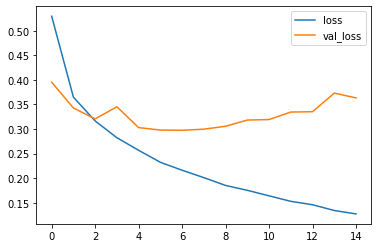

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

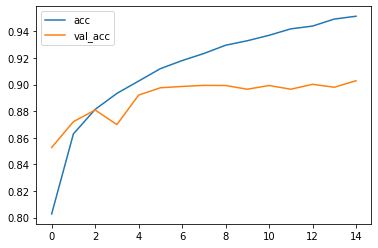

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.9029
[0.3634459972381592, 0.902899980545044]


In [ ]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis=1)
print(confusion_matrix(y_test, p_test))

[[828   3  25  13   3   1 116   0  11   0]
 [  1 982   1  11   2   0   1   0   2   0]
 [  9   1 870  10  49   0  58   0   3   0]
 [  7   4  21 914  31   0  23   0   0   0]
 [  2   1  59  17 849   0  70   0   2   0]
 [  0   0   0   2   0 966   0  20   0  12]
 [ 94   3  74  18  83   1 722   0   5   0]
 [  0   0   0   0   0  10   0 974   0  16]
 [  2   1   3   3   6   2   6   3 974   0]
 [  0   0   0   0   0   3   1  46   0 950]]


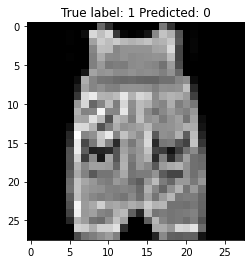

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
#plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));